# Overview
Description.

# Import Modules

## General 

In [1]:
# magics
%load_ext autoreload
%autoreload 2
%matplotlib inline

# fix integer division and general modules
import os
from __future__ import division

# numpy
import numpy as np

# scipy~
from scipy.optimize import minimize
from scipy.stats import linregress

# plotting
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rc
fp = {'family':'serif', 'serif':['Helvetica'], 'size':'20'}
rc('font', **fp)
rc('text', usetex=True)
rc('xtick', labelsize=24) 
rc('ytick', labelsize=24)

## Constitutive Law
Select the constitutive law that is to e fitted. Set `mode` to the provided type of experimental data. Either `'PK1'` for the first Piola-Kirchhoff stresses ("nominal stress") or `'CAU'`for Cauchy stresses ("true stress").

In [9]:
# EDIT =======================================================================
from hlfit.constitutive_models import constitutive_Ogden4 as cmodel

# what are the stresses obtained from experiment (CAU/PK1)
mode = 'CAU'
# ============================================================================

# constitutive settings
N = cmodel.N

if mode == 'CAU':
    constitutive_model = cmodel.stress_cau
    objective_function = cmodel.objective_function_cau
    jacobian           = cmodel.jacobian_cau
    
if mode == 'PK1':
    constitutive_model = cmodel.stress_pk1
    objective_function = cmodel.objective_function_pk1
    jacobian           = cmodel.jacobian_pk1

Parameter order: [mu1, alpha1, mu2, alpha2, mu3, alpha3, mu4, alpha4]


# Settings

In [10]:
# EDIT: set configurations ================================================
# configs = ['UA']
# configs = ['UA', 'PS']
configs = ['UA', 'PS', 'EB']
# =========================================================================

In [12]:
# set constitutive parameters
C = [5.75560000e+00,   2.49500000e-01,   2.17090000e+00,
         1.79520000e-03,   9.05580000e+00,   1.77820000e-12,
         3.43090000e+01,  -1.14730000e-02]

# strain range
eps = np.linspace(0, 1.0, 100)

# Plot

In [18]:
# load data
# eps_ua_exp, sig_ua_exp = np.loadtxt('/home/rhopf/Dropbox/b_zurich_heart/c_models/alex/data/M_UA_PDMS_mean_time_0.dat').T

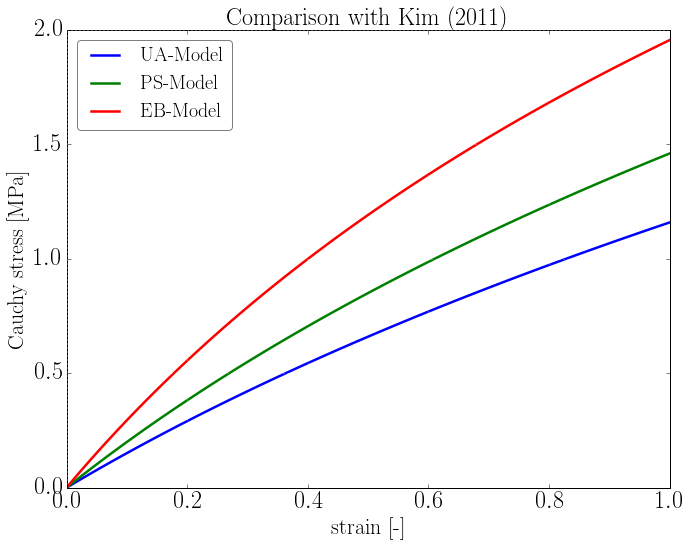

In [15]:
sig_sim = dict()
for conf in configs:
    sig_sim[conf] = constitutive_model(C, eps, config=conf)

# show data
fig = plt.figure(figsize=(10, 8))
ax  = fig.add_subplot(111)
c   = ax._get_lines.color_cycle

for conf in configs:
    color = c.next()
    ax.plot(eps, sig_sim[conf], color=color, linestyle='-', lw=2.5, label=conf + '-Model')

leg = ax.legend(loc=2, prop={'size':20}, fancybox=True)
leg.get_frame().set_alpha(0.5)
ax.set_title('Comparison with Kim (2011)')
ax.grid(color='1.0')
ax.set_xlabel('strain [-]')
if mode == 'PK1':
    ax.set_ylabel('PK1 stress [MPa]')
if mode == 'CAU':
    ax.set_ylabel('Cauchy stress [MPa]')
ax.yaxis.label.set_fontsize(22)
ax.xaxis.label.set_fontsize(22)
ax.title.set_fontsize(24)
# ax.set_xlim([0, 0.1])
# ax.set_ylim([0, 0.04])
ax.tick_params(labelsize=24, labelcolor='k')
# fig.savefig('/home/rhopf/Dropbox/b_zurich_heart/b_simulations/pdms_experimental/material_models/pdms_10-1_poly_100111.pdf',
#               transparent=True, bbox_inches='tight', pad_inches=0)
fig.tight_layout()

###Save Files

In [28]:
# np.savetxt('/home/rhopf/Dropbox/b_zurich_heart/b_simulations/pdms_experimental/material_models/ogden3_t5_set10.txt', np.r_[C_opt.x, [0, 0, 0]][None], delimiter=',')

In [19]:
# save stress strain
# np.savetxt('/home/rhopf/Dropbox/b_zurich_heart/c_models/alex/figures/figure5/EB_Data_Kim_2011.dat', np.c_[eps, sig_sim['EB']])

In [30]:
# np.savetxt('/home/rhopf/temp/mail/exp_uniaxial.dat', np.c_[eps_exp['UA'], sig_exp['UA']])
# np.savetxt('/home/rhopf/temp/mail/exp_pureshear.dat', np.c_[eps_exp['PS'], sig_exp['PS']])
# np.savetxt('/home/rhopf/temp/mail/exp_equibiaxial.dat', np.c_[eps_exp['EB'], sig_exp['EB']])